In [22]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. How to import a Time Series on Python

In [2]:
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

df = pd.read_csv(dataset_path)

df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [3]:
df["DATE"].head()

0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [4]:
df.index = pd.to_datetime(df["DATE"], format="%m-%d-%Y")
df = df.drop("DATE", axis=1)
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## 2. Visualizing a Time Series

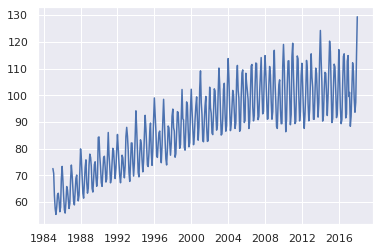

In [5]:
plt.plot(df.index, df["Value"])

## 3. How to decompose a Time Series

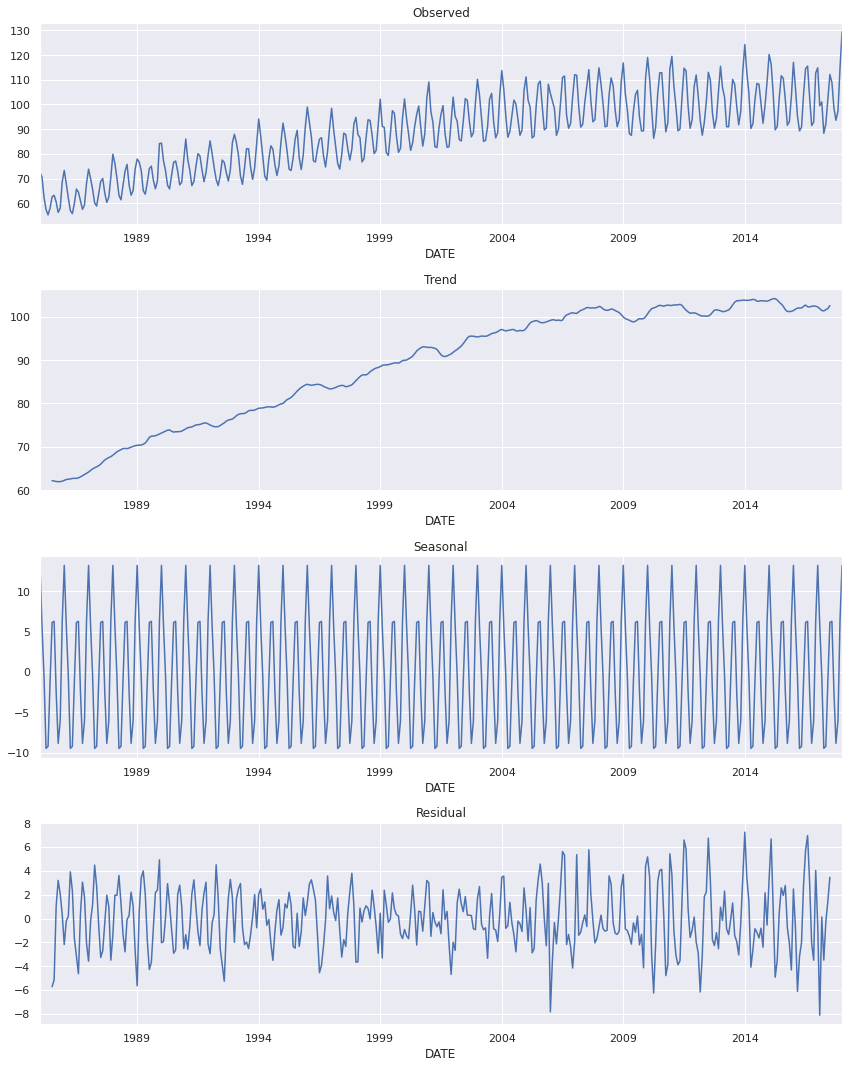

In [6]:
#give a pd.Series
result = seasonal_decompose(df["Value"])

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))
result.observed.plot(ax=ax[0], title="Observed")
result.trend.plot(ax=ax[1], title="Trend")
result.seasonal.plot(ax=ax[2], title="Seasonal")
result.resid.plot(ax=ax[3], title="Residual")
plt.tight_layout()

## 4. Exploratory Analysis and Feature Engineering

In [10]:
dataset_path_2 = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

df2 = pd.read_csv(dataset_path_2)

df2.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [11]:
df2["Datetime"] = pd.to_datetime(df2["Datetime"], format="%d-%m-%Y %H:%M")

<AxesSubplot:xlabel='Datetime'>

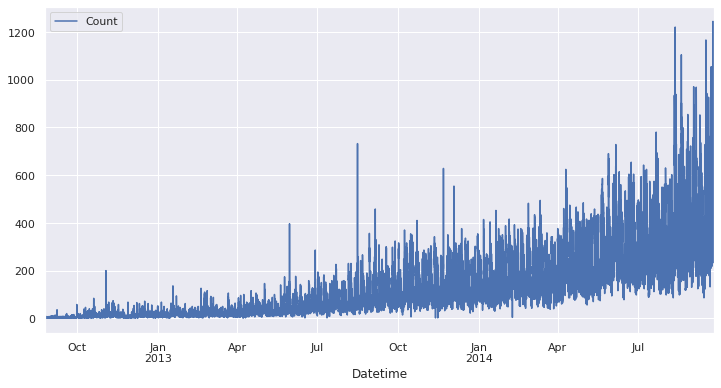

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

df2.plot(x="Datetime", y="Count", ax=ax)

In [18]:
# creating new features: feature engineering

df2['year'] = df2["Datetime"].dt.year
df2['month'] = df2["Datetime"].dt.month
df2['day'] = df2["Datetime"].dt.day
df2['hour'] = df2["Datetime"].dt.hour
df2['day_of_week'] = df2["Datetime"].dt.dayofweek
df2["weekend"] = df2["day_of_week"].isin([5, 6])

In [19]:
df2.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,True
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,True
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,True
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,True
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,True


In [20]:
df2["weekend"].value_counts()

False    13056
True      5232
Name: weekend, dtype: int64

<AxesSubplot:xlabel='weekend'>

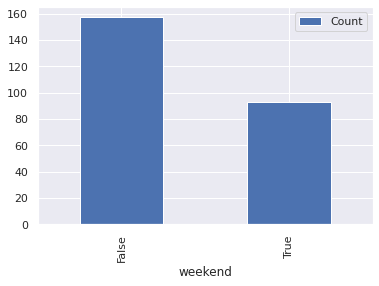

In [24]:
#Bar plot of weekend values

df2.groupby("weekend").agg({"Count": np.mean}).plot.bar()

<AxesSubplot:xlabel='hour'>

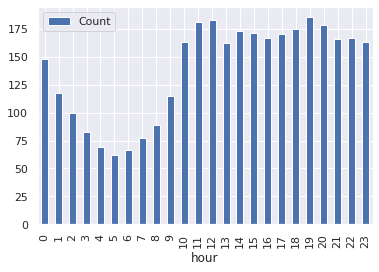

In [25]:
# Bar plot of hours

df2.groupby("hour").agg({"Count": np.mean}).plot.bar()

<AxesSubplot:xlabel='month'>

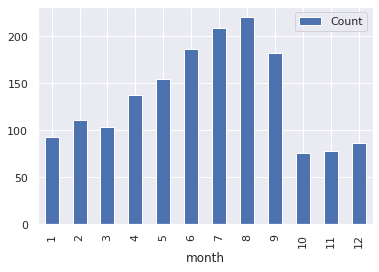

In [26]:
# Bar plot of months
df2.groupby("month").agg({"Count": np.mean}).plot.bar()